In [10]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math

Допустим, у нас есть генератор случайных числе из отрезка [0, 1]. Как получить выборку из нового распределения $F$?



### Задача 1
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.


In [11]:
def transformation(a,x):
    border=a[0]
    i=1;
    while x>border:
        border += a[i]
        i += 1
    return i-1


def random_generation_1(X):
    a=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
    a=a/sum(a)
    X=[transformation(a,i) for i in X]
    return X
    
def random_generation_2(X):
    a=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
    a=a/sum(a)
    dict={}
    for i in range(len(a)):
        dict[a[i]]=i
    a[::-1].sort()
    X=[dict[a[transformation(a,i)]] for i in X]
    return X

In [7]:
%%timeit
x = np.random.uniform(low=0, high=1, size=(1000,)) #Но тут полуинтервал [0,1)  =(
x=random_generation_1(x)

1.52 ms ± 143 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
x = np.random.uniform(low=0, high=1, size=(1000,)) #Но тут полуинтервал [0,1)  =(
x=random_generation_1(x)

C:\Users\Asus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


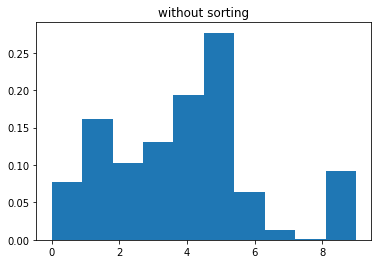

In [13]:
plt.hist(x, normed=True)
plt.title("without sorting")
plt.show()

In [14]:
%%timeit
x = np.random.uniform(low=0, high=1, size=(1000,)) #Но тут полуинтервал [0,1)  =(
x=random_generation_2(x)

1.11 ms ± 65.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
x = np.random.uniform(low=0, high=1, size=(1000,)) #Но тут полуинтервал [0,1)  =(
x=random_generation_2(x)

C:\Users\Asus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


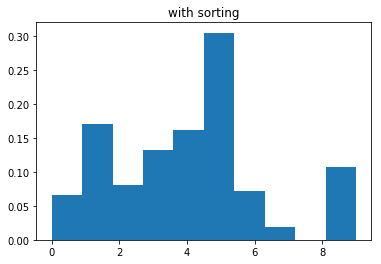

In [16]:
plt.hist(x, normed=True)
plt.title("with sorting")
plt.show()

### Inverse transform method

В следующем предложении заключается идея метода *inverse transform*:

Если $\xi$ имеет равномерное распределение в $[0,1]$, тогда $F^{-1}(\xi)$ распределена по закону $F$. (Для каких $F$ это верно?)

### Задача 2
Смоделируйте выборку размера 1000 из распределения $Exp(\lambda)$. Постройте выборочную гистограмму и точный график плотности распределения.

In [17]:
def f_1(x,a):
    return math.log(1-x)/(-a)

In [18]:
x = np.random.uniform(low=0, high=1, size=(1000,)) #Но тут полуинтервал [0,1)  =(
a=1
x=[f_1(i,a) for i in x]

C:\Users\Asus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


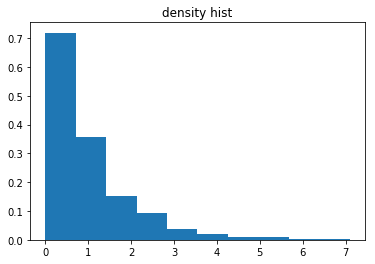

In [21]:
plt.hist(x, normed=True)
plt.title("density hist")
plt.show()

In [23]:
probability={}

### Задача 3
Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.